<a href="https://colab.research.google.com/github/lielorenstein/Sparkle/blob/main/cnn_car_not_car_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-10 15:22:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.71.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   108MB/s    in 0.6s    

2021-05-10 15:22:28 (108 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/content/dataset_car_or_not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/dataset_car_or_not'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cars_dir = os.path.join(train_dir, 'busy')

# Directory with our training dog pictures
train_not_dir = os.path.join(train_dir, 'free')

# Directory with our validation cat pictures
validation_cars_dir = os.path.join(validation_dir, 'busy')

# Directory with our validation dog pictures
validation_not_dir = os.path.join(validation_dir, 'free')

In [ ]:
train_car_fnames = os.listdir(train_cars_dir)
print(train_car_fnames[:10])

train_not_fnames = os.listdir(train_not_dir)
train_not_fnames.sort()
print(train_not_fnames[:10])

['20150703_1155_11.jpg', '20150703_1805_15.jpg', '20150703_1000_29.jpg', '20150703_1115_6.jpg', '20150703_0925_51.jpg', '20150703_1235_2.jpg', '20150703_0840_15.jpg', '20150703_1705_3.jpg', '20150703_1700_38.jpg', '20150703_1055_11.jpg']
['20150703_0805_1.jpg', '20150703_0805_10.jpg', '20150703_0805_11.jpg', '20150703_0805_12.jpg', '20150703_0805_13.jpg', '20150703_0805_16.jpg', '20150703_0805_18.jpg', '20150703_0805_19.jpg', '20150703_0805_2.jpg', '20150703_0805_20.jpg']


In [ ]:
print('total training car images:', len(os.listdir(train_cars_dir)))
print('total training not car images:', len(os.listdir(train_not_dir)))
print('total validation car images:', len(os.listdir(validation_cars_dir)))
print('total validation not car images:', len(os.listdir(validation_not_dir)))

total training car images: 3621
total training not car images: 2550
total validation car images: 4781
total validation not car images: 1632


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

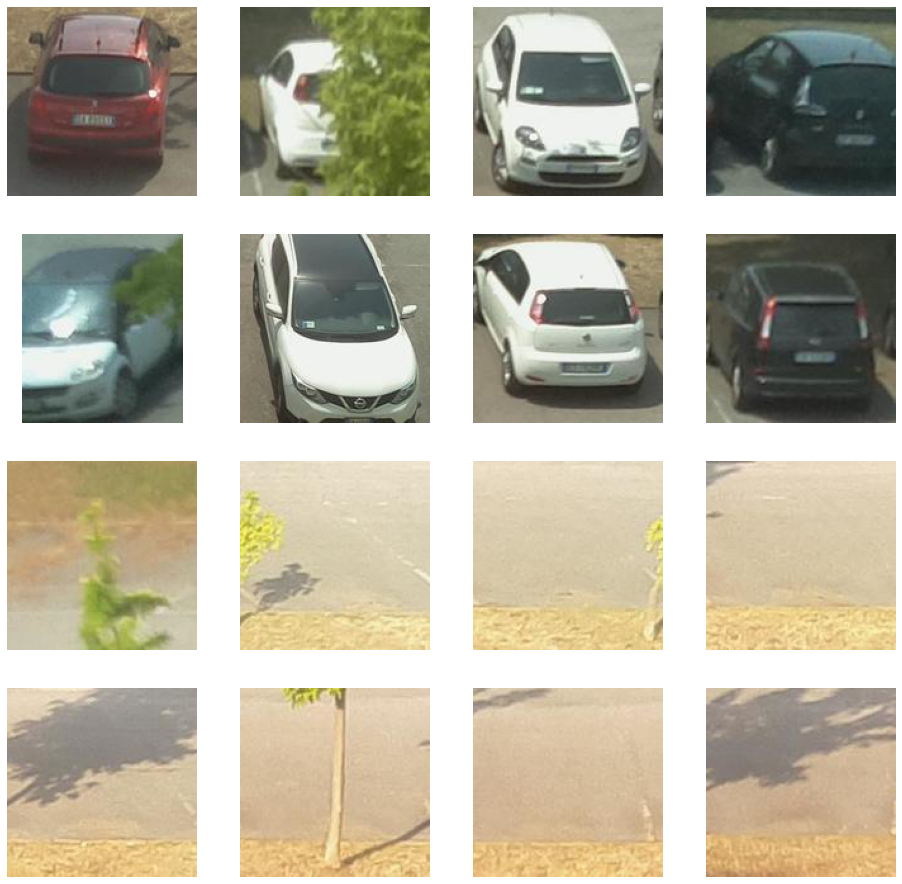

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_car_pix = [os.path.join(train_cars_dir, fname) 
                for fname in train_car_fnames[pic_index-8:pic_index]]
next_not_pix = [os.path.join(train_not_dir, fname) 
                for fname in train_not_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_car_pix+next_not_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model



---


(4) We build a model_1 without dropout and augmentation:




---



In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
from tensorflow import keras
img_input = layers.Input(shape=(150, 150, 3))

model_1 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        # First convolution extracts 16 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Second convolution extracts 32 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
history_1 = model_1.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 35s - loss: 0.5035 - acc: 0.7941 - val_loss: 0.7538 - val_acc: 0.5590
Epoch 2/15
100/100 - 3s - loss: 0.1707 - acc: 0.9503 - val_loss: 0.7568 - val_acc: 0.7120
Epoch 3/15
100/100 - 3s - loss: 0.1253 - acc: 0.9760 - val_loss: 1.4460 - val_acc: 0.5800
Epoch 4/15
100/100 - 3s - loss: 0.1053 - acc: 0.9769 - val_loss: 1.2503 - val_acc: 0.6330
Epoch 5/15
100/100 - 3s - loss: 0.2192 - acc: 0.9870 - val_loss: 1.7435 - val_acc: 0.5670
Epoch 6/15
100/100 - 3s - loss: 0.0860 - acc: 0.9905 - val_loss: 2.6140 - val_acc: 0.5470
Epoch 7/15
100/100 - 3s - loss: 0.0460 - acc: 0.9935 - val_loss: 3.5030 - val_acc: 0.6290
Epoch 8/15
100/100 - 3s - loss: 0.0259 - acc: 0.9950 - val_loss: 4.9264 - val_acc: 0.5520
Epoch 9/15
100/100 - 3s - loss: 0.0826 - acc: 0.9900 - val_loss: 2.8884 - val_acc: 0.5810
Epoch 10/15
100/100 - 3s - loss: 0.0147 - acc: 0.9960 - val_loss: 5.3666 - val_acc: 0.5750
Epoch 11/15
100/100 - 3s - loss: 0.1310 - acc: 0.9940 - val_loss: 5.1858 - val_acc: 0.6100
Epoch 1

In [ ]:
score_1 = model_1.evaluate(validation_generator, verbose=0)
print("Test loss:", score_1[0])
print("Test accuracy:", score_1[1])

Test loss: 3.4872043132781982
Test accuracy: 0.6011227369308472


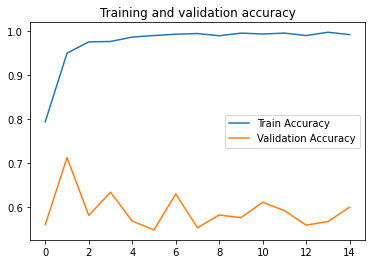

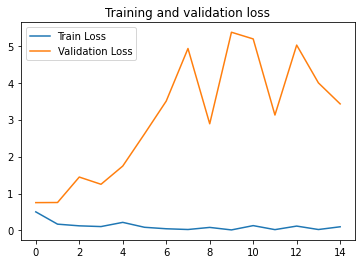

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()



---


(1) We build a model_2 with augmentation and without dropout:

---



In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
from tensorflow import keras
img_input = layers.Input(shape=(150, 150, 3))

model_2 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        # First convolution extracts 16 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Second convolution extracts 32 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_2 = model_2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 11s - loss: 0.5547 - acc: 0.7565 - val_loss: 0.4453 - val_acc: 0.8300
Epoch 2/15
100/100 - 11s - loss: 0.2706 - acc: 0.8980 - val_loss: 0.4499 - val_acc: 0.7690
Epoch 3/15
100/100 - 11s - loss: 0.1704 - acc: 0.9613 - val_loss: 0.4463 - val_acc: 0.8150
Epoch 4/15
100/100 - 10s - loss: 0.1743 - acc: 0.9417 - val_loss: 0.4852 - val_acc: 0.8290
Epoch 5/15
100/100 - 11s - loss: 0.1414 - acc: 0.9550 - val_loss: 0.4944 - val_acc: 0.8370
Epoch 6/15
100/100 - 11s - loss: 0.1037 - acc: 0.9689 - val_loss: 0.4828 - val_acc: 0.8810
Epoch 7/15
100/100 - 11s - loss: 0.1035 - acc: 0.9633 - val_loss: 0.4324 - val_acc: 0.8630
Epoch 8/15
100/100 - 11s - loss: 0.0975 - acc: 0.9709 - val_loss: 0.5988 - val_acc: 0.8830
Epoch 9/15
100/100 - 11s - loss: 0.1023 - acc: 0.9710 - val_loss: 0.6951 - val_acc: 0.8700
Epoch 10/15
100/100 - 11s - loss: 0.0953 - acc: 0.9690 - val_loss: 0.6546 - val_acc: 0.8640
Epoch 11/15
100/100 - 11s - loss: 0.0713 - acc: 0.9755 - val_loss: 0.5905 - val_acc: 0.86

In [ ]:
score_2 = model_2.evaluate(validation_generator, verbose=0)
print("Test loss:", score_2[0])
print("Test accuracy:", score_2[1])

Test loss: 0.5515168309211731
Test accuracy: 0.8566973209381104


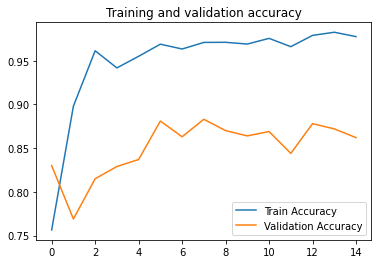

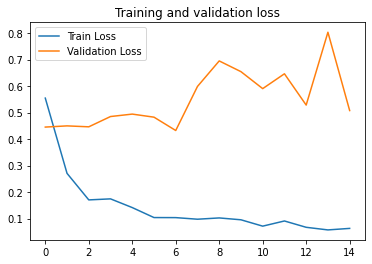

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()



---



(2) We build a model_3 with dropout and without augmentation:

---



In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
from tensorflow import keras

model_3 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        # First convolution extracts 16 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Second convolution extracts 32 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dropout(0.5), #only change!
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
history_3 = model_3.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 4s - loss: 0.5854 - acc: 0.8050 - val_loss: 0.6349 - val_acc: 0.6630
Epoch 2/15
100/100 - 3s - loss: 0.1862 - acc: 0.9550 - val_loss: 0.6862 - val_acc: 0.7090
Epoch 3/15
100/100 - 3s - loss: 0.0774 - acc: 0.9765 - val_loss: 0.9504 - val_acc: 0.6340
Epoch 4/15
100/100 - 3s - loss: 0.0864 - acc: 0.9785 - val_loss: 1.3112 - val_acc: 0.6450
Epoch 5/15
100/100 - 3s - loss: 0.0572 - acc: 0.9830 - val_loss: 1.5966 - val_acc: 0.6540
Epoch 6/15
100/100 - 3s - loss: 0.0609 - acc: 0.9905 - val_loss: 4.5232 - val_acc: 0.4130
Epoch 7/15
100/100 - 3s - loss: 0.0482 - acc: 0.9880 - val_loss: 2.7494 - val_acc: 0.5910
Epoch 8/15
100/100 - 3s - loss: 0.0360 - acc: 0.9915 - val_loss: 2.6219 - val_acc: 0.6490
Epoch 9/15
100/100 - 3s - loss: 0.0380 - acc: 0.9955 - val_loss: 3.6302 - val_acc: 0.7160
Epoch 10/15
100/100 - 3s - loss: 0.0301 - acc: 0.9925 - val_loss: 5.7321 - val_acc: 0.5390
Epoch 11/15
100/100 - 3s - loss: 0.0218 - acc: 0.9955 - val_loss: 6.0274 - val_acc: 0.5100
Epoch 12

In [ ]:
score_3 = model_3.evaluate(validation_generator, verbose=0)
print("Test loss:", score_3[0])
print("Test accuracy:", score_3[1])

Test loss: 5.511309623718262
Test accuracy: 0.579603910446167


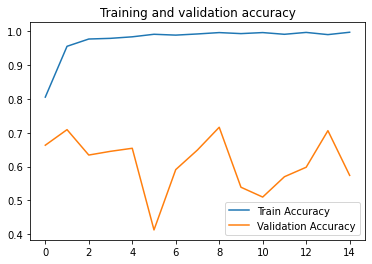

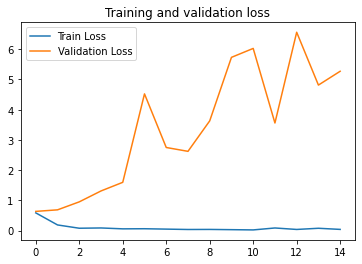

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()



---

(3) We build a model_4 with both dropout and augmentation:


---




In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
from tensorflow import keras

model_4 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        # First convolution extracts 16 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Second convolution extracts 32 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dropout(0.5), #only change!
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_4 = model_4.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 12s - loss: 0.6214 - acc: 0.7945 - val_loss: 0.5966 - val_acc: 0.6850
Epoch 2/15
100/100 - 11s - loss: 0.2279 - acc: 0.9145 - val_loss: 0.5055 - val_acc: 0.8140
Epoch 3/15
100/100 - 11s - loss: 0.2002 - acc: 0.9410 - val_loss: 0.5401 - val_acc: 0.8070
Epoch 4/15
100/100 - 10s - loss: 0.1261 - acc: 0.9585 - val_loss: 0.7044 - val_acc: 0.7700
Epoch 5/15
100/100 - 11s - loss: 0.1111 - acc: 0.9704 - val_loss: 0.5885 - val_acc: 0.8650
Epoch 6/15
100/100 - 11s - loss: 0.1366 - acc: 0.9635 - val_loss: 0.8468 - val_acc: 0.8150
Epoch 7/15
100/100 - 11s - loss: 0.1156 - acc: 0.9665 - val_loss: 0.7946 - val_acc: 0.8750
Epoch 8/15
100/100 - 11s - loss: 0.1575 - acc: 0.9760 - val_loss: 0.4872 - val_acc: 0.8360
Epoch 9/15
100/100 - 10s - loss: 0.1067 - acc: 0.9685 - val_loss: 0.5445 - val_acc: 0.8800
Epoch 10/15
100/100 - 10s - loss: 0.0636 - acc: 0.9760 - val_loss: 0.7443 - val_acc: 0.7750
Epoch 11/15
100/100 - 10s - loss: 0.1178 - acc: 0.9730 - val_loss: 0.4620 - val_acc: 0.89

In [ ]:
score_4 = model_4.evaluate(validation_generator, verbose=0)
print("Test loss:", score_4[0])
print("Test accuracy:", score_4[1])

Test loss: 1.2329983711242676
Test accuracy: 0.8607515692710876


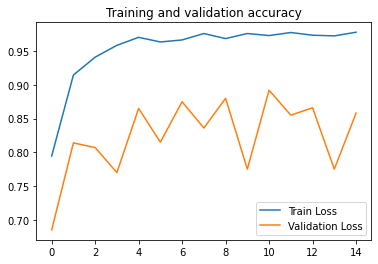

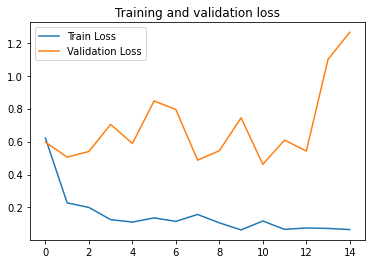

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="Train Loss")
plt.plot(epochs, val_acc, label="Validation Loss")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()



---
Conclusion:

As we can see, model_2 is the best with Test accuracy: 0.7429999709129333 and Test loss: 0.5070701837539673.


---




In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="dataset_car_or_not/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="dataset_car_or_not/validation", target_size=(224,224))

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)
early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=20,
                      verbose=1,
                      mode='auto')
hist = model.fit_generator(steps_per_epoch=100,
                           generator=traindata,
                           validation_data= testdata,
                           validation_steps=10,
                           epochs=100,
                           callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 62s 398ms/step - loss: 201.6031 - accuracy: 0.5603 - val_loss: 0.6354 - val_accuracy: 0.7406
Epoch 2/100
100/100 [==============================] - 47s 473ms/step - loss: 0.6662 - accuracy: 0.6529 - val_loss: 0.6167 - val_accuracy: 0.7344
Epoch 3/100
100/100 [==============================] - 40s 394ms/step - loss: 0.7544 - accuracy: 0.5868 - val_loss: 0.6859 - val_accuracy: 0.5375
Epoch 4/100
100/100 [==============================] - 40s 398ms/step - loss: 0.6776 - accuracy: 0.5961 - val_loss: 0.6734 - val_accuracy: 0.7219
Epoch 5/100
100/100 [==============================] - 40s 402ms/step - loss: 0.5592 - accuracy: 0.6976 - val_loss: 0.5786 - val_accuracy: 0.7906
Epoch 6/100
100/100 [==============================] - 40s 404ms/step - loss: 0.1109 - accuracy: 0.9645 - val_loss: 0.6414 - val_accuracy: 0.8594
Epoch 7/100
100/100 [==============================] - 40s 405ms/step - loss: 0.0343 - accuracy: 0.9917 - val_loss: 0.5906 - val_accur



---


We will try to get a model with higher accuracy:

---





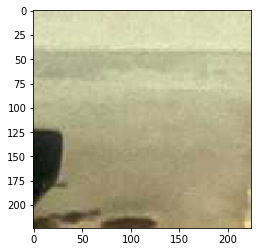

In [ ]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow

fnames = [os.path.join(train_not_dir, fname) for fname in os.listdir(train_not_dir)]
img_path = fnames[1] # Choose one image to view
img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it
x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

plt.imshow(image.array_to_img(x[0]))

In [ ]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=True)

features = model.predict(x)
decode_predictions(features, top=5)

ImportError: ignored

In [ ]:
from keras import layers, models, optimizers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

NameError: ignored

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=40, # batches in the generator are 50, so it takes 40 batches to get to 2000 images
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20) # batches in the generator are 50, so it takes 40 batches to get to 2000 images

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
40/40 [==============================] - 25s 624ms/step - loss: 0.3426 - acc: 0.9560 - val_loss: 0.2458 - val_acc: 0.9700
Epoch 2/30
40/40 [==============================] - 25s 624ms/step - loss: 0.2709 - acc: 0.9695 - val_loss: 0.2575 - val_acc: 0.9720
Epoch 3/30
40/40 [==============================] - 25s 630ms/step - loss: 0.1899 - acc: 0.9740 - val_loss: 0.2186 - val_acc: 0.9730
Epoch 4/30
40/40 [==============================] - 25s 630ms/step - loss: 0.1404 - acc: 0.9805 - val_loss: 0.1842 - val_acc: 0.9750
Epoch 5/30
40/40 [==============================] - 25s 629ms/step - loss: 0.1153 - acc: 0.9795 - val_loss: 0.1886 - val_acc: 0.9730
Epoch 6/30
40/40 [==============================] - 25s 628ms/step - loss: 0.0930 - acc: 0.9860 - val_loss: 0.2157 - val_acc: 0.9720
Epoch 7/30
40/40 [==============================] - 25s 627ms/step - loss: 0.0785 - acc: 0.9845 - val_loss: 0.2165 - val_acc: 0.9740
Epoch 8/30
40/40 [==============================] - 25s 628ms/step - 

In [ ]:
score = model.evaluate(validation_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21156862378120422
Test accuracy: 0.9800000190734863


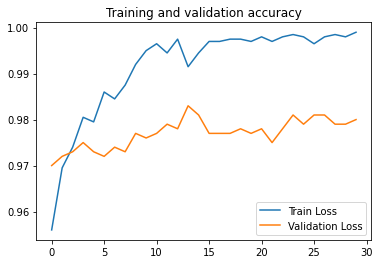

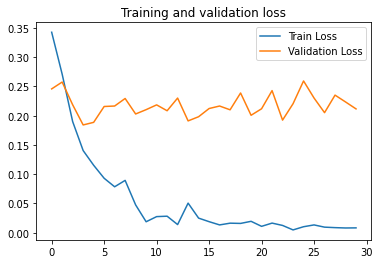

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="Train Loss")
plt.plot(epochs, val_acc, label="Validation Loss")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()

This is the best model we were able to get to!

The Test accuracy is 0.9800000190734863 and the Test loss: 0.21156862378120422 !